In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C://Users//PRAGATHI RAVIPATI//Downloads//wsj2012_ticker_added_New.xlsx", usecols=lambda x: 'Unnamed' not in x)

In [3]:
df.head()

,url,time,category,sub category1,sub category2,author,title,content,tic_list
0,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:31,NaN,NaN,NaN,Kelsey Gee,"Downsizing, Nonprofit Sells Building",One of the city's oldest nonprofit organizatio...,"['TST', 'EML']"
1,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:27,NaN,NaN,NaN,NaN,The Future of News Corp.,Rupert Murdoch's decision to split News Corp. ...,"['CBRE', 'TST', 'NWSA']"
2,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:24,NaN,NaN,NaN,Maura Webber Sadovi,Recommitting to Yonkers,"After months of negotiations, a Japanese manuf...","['CARH.1', 'TST', 'HUD']"
3,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:00,NaN,NaN,NaN,Ralph Gardner Jr.,Fully Booked at the Park,The conditions in Bryant Park weren't ideal fo...,['TST']
4,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 02:33,NaN,NaN,NaN,Jacob Gershman,Familiar Face to Run Espada&#39;s Clinic,The Bronx health clinic plundered by Sen. Pedr...,"['TST', 'HUD']"


In [4]:
df.isnull().sum()

url                  0
time                 0
category         30684
sub category1    30684
sub category2    30684
author            3060
title                0
content              0
tic_list             0
dtype: int64

In [5]:
# Drop irrelevant columns
df = df.drop(['sub category1', 'sub category2'], axis=1)

In [6]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df['title'] = imputer.fit_transform(df[['title']])

In [7]:
# Print the preprocessed dataset
df.head()

,url,time,category,author,title,content,tic_list
0,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:31,NaN,Kelsey Gee,"Downsizing, Nonprofit Sells Building",One of the city's oldest nonprofit organizatio...,"['TST', 'EML']"
1,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:27,NaN,NaN,The Future of News Corp.,Rupert Murdoch's decision to split News Corp. ...,"['CBRE', 'TST', 'NWSA']"
2,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:24,NaN,Maura Webber Sadovi,Recommitting to Yonkers,"After months of negotiations, a Japanese manuf...","['CARH.1', 'TST', 'HUD']"
3,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:00,NaN,Ralph Gardner Jr.,Fully Booked at the Park,The conditions in Bryant Park weren't ideal fo...,['TST']
4,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 02:33,NaN,Jacob Gershman,Familiar Face to Run Espada&#39;s Clinic,The Bronx health clinic plundered by Sen. Pedr...,"['TST', 'HUD']"


In [8]:
sia = SentimentIntensityAnalyzer()

In [9]:
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [10]:
df['sentiment_score'] = df['content'].apply(get_sentiment_score)

In [11]:
df['sentiment_category'] = df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

In [15]:
df.head()

,url,time,category,author,title,content,tic_list,sentiment_score,sentiment_category
0,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:31,NaN,Kelsey Gee,"Downsizing, Nonprofit Sells Building",One of the city's oldest nonprofit organizatio...,"['TST', 'EML']",-0.9672,Negative
1,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:27,NaN,NaN,The Future of News Corp.,Rupert Murdoch's decision to split News Corp. ...,"['CBRE', 'TST', 'NWSA']",0.9514,Positive
2,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:24,NaN,Maura Webber Sadovi,Recommitting to Yonkers,"After months of negotiations, a Japanese manuf...","['CARH.1', 'TST', 'HUD']",0.9915,Positive
3,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:00,NaN,Ralph Gardner Jr.,Fully Booked at the Park,The conditions in Bryant Park weren't ideal fo...,['TST'],0.9929,Positive
4,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 02:33,NaN,Jacob Gershman,Familiar Face to Run Espada&#39;s Clinic,The Bronx health clinic plundered by Sen. Pedr...,"['TST', 'HUD']",-0.9675,Negative


In [23]:
content_sentiment = df[['url','content', 'sentiment_category']]

(content_sentiment)

,url,content,sentiment_category
0,https://www.wsj.com/articles/SB100014240527023...,One of the city's oldest nonprofit organizatio...,Negative
1,https://www.wsj.com/articles/SB100014240527023...,Rupert Murdoch's decision to split News Corp. ...,Positive
2,https://www.wsj.com/articles/SB100014240527023...,"After months of negotiations, a Japanese manuf...",Positive
3,https://www.wsj.com/articles/SB100014240527023...,The conditions in Bryant Park weren't ideal fo...,Positive
4,https://www.wsj.com/articles/SB100014240527023...,The Bronx health clinic plundered by Sen. Pedr...,Negative
...,...,...,...
30679,https://www.wsj.com/articles/SB100014240527023...,The dollar and euro fell to fresh multi-month ...,Negative
30680,https://www.wsj.com/articles/SB100014240527023...,MELBOURNE—Australia's Fortescue Metals Group L...,Positive
30681,https://www.wsj.com/articles/SB100014240527023...,Business & Finance***U.S. and European stocks ...,Negative
30682,https://www.wsj.com/articles/SB100014240527023...,Voters on the Emerald Isle will decide Thursda...,Negative


In [29]:
# Counting the number of positive and negative events
sentiment_counts = df['sentiment_category'].value_counts()

In [34]:
sentiment_counts

Positive    22362
Negative     8322
Name: sentiment_category, dtype: int64

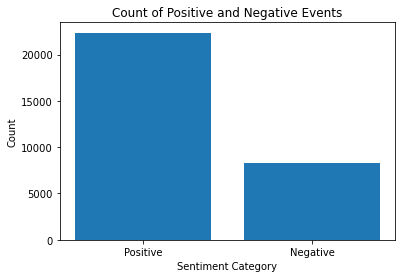

In [30]:
# Creating bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Events')
plt.show()

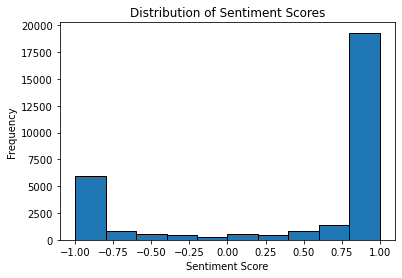

In [26]:
# Plotting histogram of sentiment scores
plt.hist(df['sentiment_score'], bins=10, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [27]:
# Grouping by sentiment category and calculating mean sentiment score
sentiment_summary = df.groupby('sentiment_category')['sentiment_score'].mean()

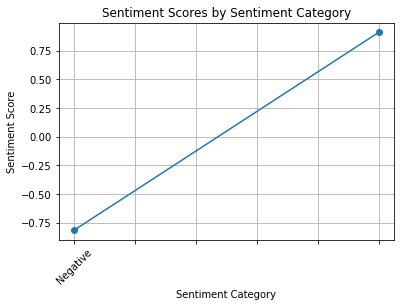

In [28]:
# Creating line graph
sentiment_summary.plot(kind='line', marker='o')

plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Sentiment Category')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [31]:
# Exporting the results to an Excel file
df.to_excel('wsj2012sentimentanalysis.xlsx', index=False)

In [32]:
df_new = pd.read_excel("C://Users//PRAGATHI RAVIPATI//Downloads//wsj2012sentimentanalysis.xlsx")

In [33]:
df_new.head()

,url,time,category,author,title,content,tic_list,sentiment_score,sentiment_category
0,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:31,NaN,Kelsey Gee,"Downsizing, Nonprofit Sells Building",One of the city's oldest nonprofit organizatio...,"['TST', 'EML']",-0.9672,Negative
1,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:27,NaN,NaN,The Future of News Corp.,Rupert Murdoch's decision to split News Corp. ...,"['CBRE', 'TST', 'NWSA']",0.9514,Positive
2,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:24,NaN,Maura Webber Sadovi,Recommitting to Yonkers,"After months of negotiations, a Japanese manuf...","['CARH.1', 'TST', 'HUD']",0.9915,Positive
3,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 03:00,NaN,Ralph Gardner Jr.,Fully Booked at the Park,The conditions in Bryant Park weren't ideal fo...,['TST'],0.9929,Positive
4,https://www.wsj.com/articles/SB100014240527023...,2012-07-02 02:33,NaN,Jacob Gershman,Familiar Face to Run Espada&#39;s Clinic,The Bronx health clinic plundered by Sen. Pedr...,"['TST', 'HUD']",-0.9675,Negative
